# Module 6

# Clustering for Diversification Analysis

In [1]:
# Import Lobraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler , Normalizer , LabelEncoder
from sklearn.cluster import KMeans

import time

%matplotlib inline

### Creating DataFrame with Close price of 30 Stocks

In [2]:
df=pd.DataFrame()

In [3]:
# Large Cap
axisbank=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\AXISBANK.csv')
bpcl=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\BPCL.csv')
gail=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\GAIL.csv')
cipla=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\CIPLA.csv')
hdfc=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\HDFC.csv')
itc=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\ITC.csv')
tcs=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\TCS.csv')
lt=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\LT.csv')
maruti=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\MARUTI.csv')
titan=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Large_Cap\Large_cap\TITAN.csv')

df['AXISBANK']=axisbank['Close Price']
df['BPCL']=bpcl['Close Price']
df['GAIL']=gail['Close Price']
df['CIPLA']=cipla['Close Price']
df['HDFC']=hdfc['Close Price']
df['ITC']=itc['Close Price']
df['TCS']=tcs['Close Price']
df['LT']=lt['Close Price']
df['MARUTI']=maruti['Close Price']
df['TITAN']=titan['Close Price']

In [4]:
# Mid_Cap
adani=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\ADANIPOWER.csv')
apollo=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\APOLLOTYRE.csv')
berge=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\BERGEPAINT.csv')
dhfl=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\DHFL.csv')
gmr=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\GMRINFRA.csv')
idbi=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\IDBI.csv')
igl=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\IGL.csv')
nbcc=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\NBCC.csv')
pnb=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\PNB.csv')
suntv=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Mid_Cap\Mid_cap\SUNTV.csv')

df['ADANIPOWER']=adani['Close Price']
df['APOLLOTYRE']=apollo['Close Price']
df['BERGEPAINT']=berge['Close Price']
df['DHFL']=dhfl['Close Price']
df['GMRINFRA']=gmr['Close Price']
df['IDBI']=idbi['Close Price']
df['IGL']=igl['Close Price']
df['NBCC']=nbcc['Close Price']
df['PNB']=pnb['Close Price']
df['SUNTV']=suntv['Close Price']

In [5]:
# Small Cap
ashoka=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\ASHOKA.csv')
fortis=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\FORTIS.csv')
idfc=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\IDFC.csv')
venkeys=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\VENKEYS.csv')
lux=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\LUXIND.csv')
ncc=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\NCC.csv')
pvr=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\PVR.csv')
rcom=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\RCOM.csv')
jklakshmi=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\JKLAKSHMI.csv')
raymond=pd.read_csv(r'D:\Intern\CL_ML\Stocks\Small_Cap\Small_cap\RAYMOND.csv')

df['ASHOKA']=ashoka['Close Price']
df['FORTIS']=fortis['Close Price']
df['IDFC']=idfc['Close Price']
df['VENKEYS']=venkeys['Close Price']
df['LUX']=lux['Close Price']
df['NCC']=ncc['Close Price']
df['PVR']=pvr['Close Price']
df['RCOM']=rcom['Close Price']
df['JKLAKSHMI']=jklakshmi['Close Price']
df['RAYMOND']=raymond['Close Price']

In [6]:
df['Date']=raymond['Date']
df.Date=pd.to_datetime(df['Date'])
df.set_index('Date' , inplace=True)

In [7]:
df.head()

,AXISBANK,BPCL,GAIL,CIPLA,HDFC,ITC,TCS,LT,MARUTI,TITAN,...,ASHOKA,FORTIS,IDFC,VENKEYS,LUX,NCC,PVR,RCOM,JKLAKSHMI,RAYMOND
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,500.1,727.85,414.00,569.00,1559.50,277.95,2365.10,1742.40,6823.90,483.65,...,216.05,205.25,63.70,1169.70,819.60,97.35,1524.95,32.00,510.80,772.80
2017-05-16,501.5,733.30,411.40,565.60,205.00,283.45,2429.15,1740.70,6953.95,488.30,...,214.90,207.90,64.25,1177.00,817.50,100.40,1539.00,32.10,527.50,785.00
2017-05-17,502.8,727.45,408.30,562.35,1566.55,281.65,2455.35,1755.45,6958.20,481.75,...,217.00,205.90,63.35,1188.00,819.80,101.45,1530.30,31.95,516.20,783.65
2017-05-18,492.0,714.90,404.75,560.10,1552.50,277.90,2536.20,1722.60,6831.05,471.65,...,209.65,196.85,61.50,1156.90,820.05,97.00,1515.05,31.05,478.95,746.95
2017-05-19,501.7,702.45,401.05,564.95,207.00,286.20,2507.15,1724.55,6790.55,471.15,...,206.25,203.55,61.15,1161.65,817.80,95.45,1513.55,30.55,469.55,723.10


In [8]:
df.describe()

,AXISBANK,BPCL,GAIL,CIPLA,HDFC,ITC,TCS,LT,MARUTI,TITAN,...,ASHOKA,FORTIS,IDFC,VENKEYS,LUX,NCC,PVR,RCOM,JKLAKSHMI,RAYMOND
count,495.000000,495.000000,494.000000,495.000000,495.000000,495.000000,495.000000,494.000000,495.000000,495.000000,...,494.000000,495.000000,495.000000,494.000000,494.000000,495.000000,495.000000,494.000000,494.000000,494.000000
mean,577.981010,435.695556,383.694433,575.937374,1054.830202,281.634747,2385.678081,1332.947470,8063.683232,830.884040,...,182.602126,147.191313,50.677374,2509.120243,1462.075607,99.698586,1408.665354,16.759109,377.028239,857.047065
std,79.259973,103.695842,51.773508,42.395277,715.867068,17.766315,464.131522,147.809173,914.042893,173.174243,...,51.895653,15.328597,8.477417,661.662280,308.205534,17.294219,134.240235,7.317379,66.593119,119.766977
min,449.950000,257.200000,307.950000,488.900000,193.000000,251.600000,1721.600000,1117.600000,6511.050000,463.900000,...,97.550000,114.200000,34.750000,1144.900000,789.150000,65.700000,1101.550000,1.850000,264.000000,600.450000
25%,516.550000,361.825000,343.150000,540.725000,330.000000,267.725000,1987.625000,1235.062500,7256.700000,766.700000,...,130.212500,136.775000,43.350000,2128.800000,1203.850000,86.825000,1320.700000,12.862500,319.450000,774.575000
50%,545.900000,407.800000,368.100000,570.100000,1547.900000,277.700000,2397.450000,1318.025000,7893.700000,867.150000,...,187.325000,144.650000,51.250000,2370.500000,1463.700000,94.300000,1392.250000,15.900000,385.150000,817.300000
75%,620.175000,495.425000,414.000000,609.700000,1752.150000,293.700000,2637.825000,1371.312500,8886.800000,932.550000,...,229.012500,151.550000,58.275000,2792.837500,1731.237500,112.450000,1477.775000,22.237500,431.037500,946.125000
max,780.700000,754.850000,511.200000,672.800000,1967.600000,342.500000,3603.700000,1804.900000,9832.450000,1158.550000,...,284.250000,207.900000,66.650000,4574.900000,2074.850000,140.050000,1808.100000,36.150000,527.500000,1132.400000


In [9]:
df.isnull().sum()

AXISBANK      0
BPCL          0
GAIL          1
CIPLA         0
HDFC          0
ITC           0
TCS           0
LT            1
MARUTI        0
TITAN         0
ADANIPOWER    1
APOLLOTYRE    1
BERGEPAINT    1
DHFL          0
GMRINFRA      1
IDBI          1
IGL           0
NBCC          1
PNB           1
SUNTV         1
ASHOKA        1
FORTIS        0
IDFC          0
VENKEYS       1
LUX           1
NCC           0
PVR           0
RCOM          1
JKLAKSHMI     1
RAYMOND       1
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2017-05-15 to 2019-05-13
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AXISBANK    494 non-null    float64
 1   BPCL        494 non-null    float64
 2   GAIL        494 non-null    float64
 3   CIPLA       494 non-null    float64
 4   HDFC        494 non-null    float64
 5   ITC         494 non-null    float64
 6   TCS         494 non-null    float64
 7   LT          494 non-null    float64
 8   MARUTI      494 non-null    float64
 9   TITAN       494 non-null    float64
 10  ADANIPOWER  494 non-null    float64
 11  APOLLOTYRE  494 non-null    float64
 12  BERGEPAINT  494 non-null    float64
 13  DHFL        494 non-null    float64
 14  GMRINFRA    494 non-null    float64
 15  IDBI        494 non-null    float64
 16  IGL         494 non-null    float64
 17  NBCC        494 non-null    float64
 18  PNB         494 non-null    float64
 19  SUNTV     

In [12]:
df_2=df.pct_change()

In [13]:
df_2=df_2.dropna()

In [14]:
import math
df_3=pd.DataFrame()
df_3['annual_returns']=df_2.mean() * 252 
df_3['Volatility']=df_2.std() * math.sqrt(252)  

In [15]:
df_3

,annual_returns,Volatility
AXISBANK,0.235246,0.277896
BPCL,-0.250364,0.436175
GAIL,-0.052551,0.338425
CIPLA,0.021976,0.254183
HDFC,455.057496,43.120575
ITC,0.064014,0.223863
TCS,0.080470,0.431387
LT,-0.085904,0.314323
MARUTI,0.010195,0.225258
TITAN,0.473109,0.324361


In [16]:
scaler=StandardScaler().fit(df_3)
df_std=scaler.transform(df_3)

In this step, I am applying k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

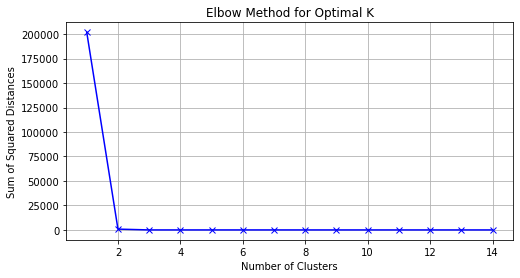

In [17]:
# ssd - Sum of squared Distances from cluster center
ssd=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(df_3)
    ssd.append(km.inertia_)
plt.figure(figsize=(8,4))
plt.plot(K,ssd , 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

Optimal Number of Clusters are 2

In [18]:
import time
ssd2=[]
start_time = time.time()
km=KMeans(n_clusters=2)
km=km.fit(df_std)
km_labels = km.predict(df_std)
ssd2.append(km.inertia_)
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

--- Run time: 0.0 mins ---


In [19]:
km_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_std) 
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
df_3['labels'] = km.labels_
centers = km.cluster_centers_
y_kmeans = km.predict(df_std)

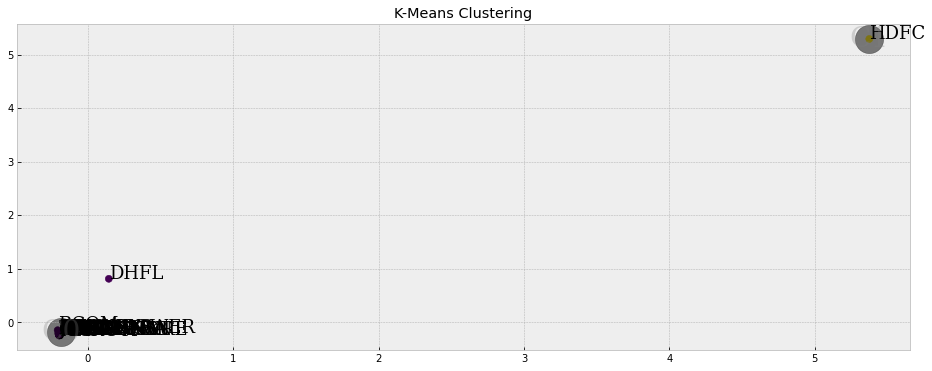

In [22]:
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(df_std[:, 0], 
            df_std[:, 1], 
            c=y_kmeans, 
            s=50, 
            cmap='viridis'
            )

ax.scatter(centers[:, 0], 
           centers[:, 1], 
           c='black', 
           s=800, 
           alpha=0.5
           )

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

for x, y, name in zip(df_std[:, 0], df_std[:, 1], df_3.index):
    ax.text(x, 
            y, 
            name, 
            fontdict=font,
            # verticalalignment='center', 
            # horizontalalignment='center',
            rotation=0
            )


font = {'family': 'serif',
        'color':  'gray',
        'weight': 'normal',
        'size': 28,
        }

for i, cord in enumerate(centers):
    ax.text(cord[0], 
            cord[1], 
            f"C{i}",
            horizontalalignment='center',
            verticalalignment='center', 
            fontdict=font,             
            rotation=0, 
            alpha=0.3
            )

plt.title('K-Means Clustering')
plt.show()